## Short example of the advantage of iDQN over DQN

### Define the environment

In [1]:
from idqn.environments.lqr import LinearQuadraticEnv
import numpy as np

env = LinearQuadraticEnv(A=0.8, B=-0.9, Q=-0.5, R=-0.5, S=0.2)
print("P:", env.P)
print("Optimal M:", env.optimal_weights[2], "Optimal G:", env.optimal_weights[0])
max_g = np.abs(env.optimal_weights[0] / 2)
min_m = 2 * env.optimal_weights[2]  # always negative
initial_point = np.array([0.5 * env.optimal_weights[2], -max_g / 2])

Transition: s' = As + Ba
Transition: s' = 0.8s + -0.9a
Reward: Qs² + 2 Ssa + Ra²
Reward: -0.5s² + 0.4sa + -0.5a²
P: -0.47176912283546646
Optimal M: -0.882133 Optimal G: -0.8019322


### Compute the optimal itertaions

In [2]:
def optimal_bellman_iteration(point):
    return np.array([env.R + env.B ** 2 * point[1], env.Q + env.A ** 2 * point[1]])

def projection(point):
    return np.array([min(point[0], 0), np.clip(point[1], -max_g, max_g)])

def bellman_line(m):
    return env.Q - env.R * env.A ** 2 / env.B ** 2 + env.A ** 2 / env.B ** 2 * m

### Run DQN and iDQN (offline)

In [3]:
import jax
import jax.numpy as jnp

initial_point = np.array([0.5 * env.optimal_weights[2], -max_g / 2])
dqn_point = optimal_bellman_iteration(initial_point)

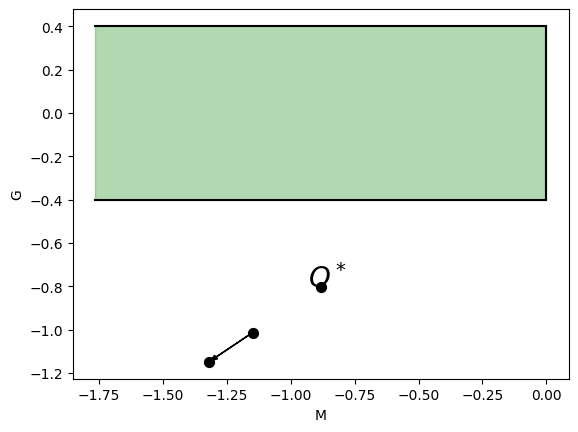

In [4]:
import matplotlib.pyplot as plt

n_points = 10
ms = np.linspace(min_m, 0, n_points)

# Optimal point
plt.scatter(env.optimal_weights[2], env.optimal_weights[0], color="black", s=50)
plt.text(-0.05 + env.optimal_weights[2], env.optimal_weights[0], "$Q^*$", fontsize=20)

# Allowed parameter space
plt.plot(ms, np.ones(n_points) * max_g, color="black")
plt.plot(ms, -np.ones(n_points) * max_g, color="black")
plt.fill_between(ms, -np.ones(n_points) * max_g, np.ones(n_points) * max_g, color="green", alpha=0.3)
plt.vlines(0, ymin=-max_g, ymax=max_g, color="black")

# Plot the first Bellman iteration
initial_point = optimal_bellman_iteration(np.array([env.optimal_weights[2], - 2 * max_g]))
plt.scatter(initial_point[0], initial_point[1], color="black", s=50)
x, y = initial_point[0], initial_point[1]
first_iteration = optimal_bellman_iteration(initial_point)
dx, dy = first_iteration[0] - x, first_iteration[1] - y
plt.arrow(x, y, dx / 1.2, dy / 1.2, head_width = 0.02, color="black")

plt.scatter(first_iteration[0], first_iteration[1], color="black", s=50)

# plt.xlim(-1, -0.25)
# plt.ylim(-1, 0)
plt.xlabel("M")
plt.ylabel("G")
plt.savefig("pratical_example_dqn.pdf", bbox_inches='tight')

In [5]:
np.array([env.optimal_weights[2], - 2 * max_g])

array([-0.88213301, -0.80193222])

In [6]:
env.optimal_weights

Array([-0.8019322 ,  0.53967375, -0.882133  ], dtype=float32)

In [7]:
env.optimal_weights

Array([-0.8019322 ,  0.53967375, -0.882133  ], dtype=float32)

In [8]:
env.optimal_weights

Array([-0.8019322 ,  0.53967375, -0.882133  ], dtype=float32)

In [15]:
a = np.array([100 * env.optimal_weights[2], 0.1 * env.optimal_weights[0]])

for i in range(100000):
    a = optimal_bellman_iteration(a)

a

array([-1.625     , -1.38888889])

In [13]:
env.Q / (1 - env.A**2)

-1.3888888888888893

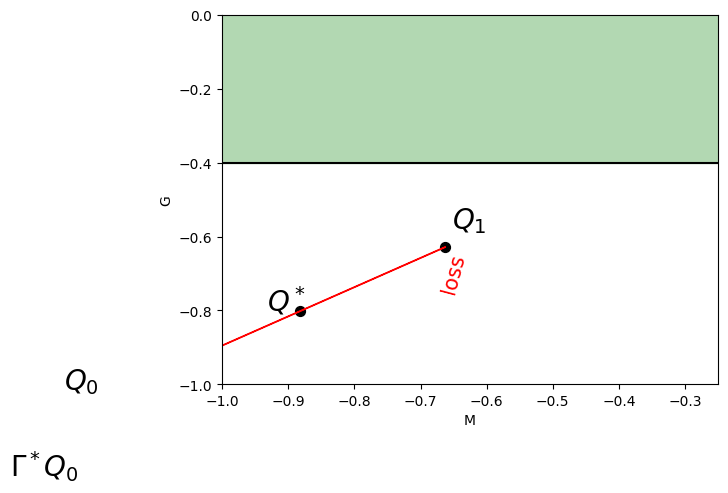

In [10]:
import matplotlib.pyplot as plt

n_points = 10
ms = np.linspace(min_m, 0, n_points)

# Optimal point
plt.scatter(env.optimal_weights[2], env.optimal_weights[0], color="black", s=50)
plt.text(-0.05 + env.optimal_weights[2], env.optimal_weights[0], "$Q^*$", fontsize=20)

# Allowed parameter space
plt.plot(ms, np.ones(n_points) * max_g, color="black")
plt.plot(ms, -np.ones(n_points) * max_g, color="black")
plt.fill_between(ms, -np.ones(n_points) * max_g, np.ones(n_points) * max_g, color="green", alpha=0.3)
plt.vlines(0, ymin=-max_g, ymax=max_g, color="black")

# Plot the first Bellman iteration and its projection
plt.scatter(initial_point[0], initial_point[1], color="black", s=50)
plt.text(-0.09 + initial_point[0], initial_point[1], "$Q_0$", fontsize=20)
x, y = initial_point[0], initial_point[1]
first_iteration = optimal_bellman_iteration(initial_point)
dx, dy = first_iteration[0] - x, first_iteration[1] - y
plt.arrow(x, y, dx / 1.2, dy / 1.2, head_width = 0.02, color="black")

plt.scatter(first_iteration[0], first_iteration[1], color="black", s=50)
plt.text(first_iteration[0], -0.1 + first_iteration[1], f"$\Gamma^*Q_0$", fontsize=20)

first_projection = projection(first_iteration)
x, y = first_projection[0], first_projection[1]
dx, dy = first_iteration[0] - x, first_iteration[1] - y
plt.arrow(x, y, dx, dy, color="black", linestyle="dashed")

# Plot DQN point
plt.scatter(dqn_point[0], dqn_point[1], color="black", s=50)
plt.text(0.01 + dqn_point[0], 0.05 + dqn_point[1], "$Q_1$", color="black", fontsize=20)

# Plot DQN loss
x, y = dqn_point[0], dqn_point[1]
dx, dy = first_iteration[0] - x, first_iteration[1] - y
plt.arrow(x, y, dx, dy, color="red")
plt.text(-0.01 + dqn_point[0], -0.12 + dqn_point[1], "loss", color="red", fontsize=15, rotation=75)

plt.xlim(-1, -0.25)
plt.ylim(-1, 0)
plt.xlabel("M")
plt.ylabel("G")
plt.savefig("pratical_example_dqn.pdf", bbox_inches='tight')